In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

ENTITY = 'nikebless-thesis'
PROJECT = 'ibc'
OUTPUT_DIR = '../thesis-images'

In [2]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

## 1. Getting Wandb runs data

In [3]:
import wandb
api = wandb.Api()

ebm_unregularized_runs = api.runs(f'{ENTITY}/{PROJECT}', {
    "$or": [{
        'state': {'$ne': 'running'},
        'config.loss': {'$eq': 'ebm'},
        'config.temporal_regularization': {'$eq': 0},
        'config.temporal_group_size': {'$eq': 2},
    }]
})
l2_runs = api.runs(f'{ENTITY}/{PROJECT}', {
    "$and": [{
        'config.temporal_regularization_type': {'$eq': 'l2'},
        'state': {'$ne': 'running'},
        'tags': {'$nin': ['wrong-regularization']}
    }]
})
explicit_group_baseline_runs = api.runs(f'{ENTITY}/{PROJECT}', {
    "$and": [{
        'state': {'$ne': 'running'},
        'tags': {'$nin': ['wrong-regularization']},
        'config.loss': {'$eq': 'mae'},
        'config.temporal_group_size': {'$eq': 2}
    }]
})

## 2. Whiteness vs Regularization strength

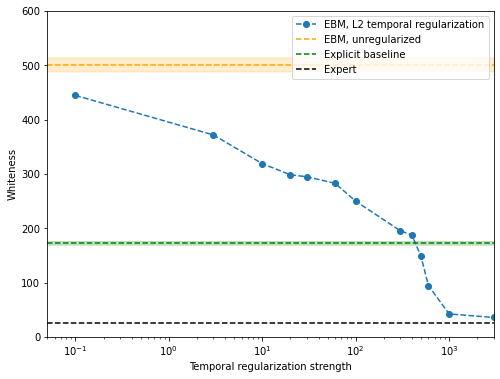

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# regularized
whiteness_vals = []
reg_strengths = []
expert_whiteness = None


for run in sorted(l2_runs, key=lambda r: r.config['temporal_regularization']):
    reg_strengths.append(run.config['temporal_regularization'])
    whiteness_vals.append(run.summary.whiteness)
    if expert_whiteness is None:
        expert_whiteness = run.summary.expert_whiteness

# Explicit baseline
explicit_whiteness_vals = [run.summary.whiteness for run in explicit_group_baseline_runs]
# EBM unregularized
ebm_unregularized_whiteness_vals = [run.summary.whiteness for run in ebm_unregularized_runs]

ax.set_ylabel('Whiteness')
ax.set_xlabel('Temporal regularization strength')

ax.set_xscale('log')
ax.set_ylim(0, 600)
ax.set_xlim(0.05, np.max(reg_strengths) + 1)

ebm_whiteness_mean = np.mean(ebm_unregularized_whiteness_vals)
ebm_whiteness_std = np.std(ebm_unregularized_whiteness_vals)

explicit_whiteness_mean = np.mean(explicit_whiteness_vals)
explicit_whiteness_std = np.std(explicit_whiteness_vals)

ax.plot(reg_strengths, whiteness_vals, '--o', label='EBM, L2 temporal regularization')
ax.fill_between(np.arange(-5, np.max(reg_strengths) + 5), ebm_whiteness_mean - ebm_whiteness_std, ebm_whiteness_mean + ebm_whiteness_std, color='orange', alpha=0.2)
ax.axhline(np.mean(ebm_unregularized_whiteness_vals), color='orange', linestyle='--', label='EBM, unregularized')
ax.fill_between(np.arange(-5, np.max(reg_strengths) + 5), explicit_whiteness_mean - explicit_whiteness_std, explicit_whiteness_mean + explicit_whiteness_std, color='green', alpha=0.2)
ax.axhline(np.mean(explicit_whiteness_vals), color='green', linestyle='--', label='Explicit baseline')

ax.axhline(expert_whiteness, color='black', linestyle='--', label='Expert')

plt.legend(loc='upper right')

fig.savefig(f'{OUTPUT_DIR}/whiteness-vs-temp-reg-strength.png')

## 3. MAE vs Regularization strength

/tmp/ipykernel_12516/2413467329.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(-5, np.max(reg_vals)+1000)


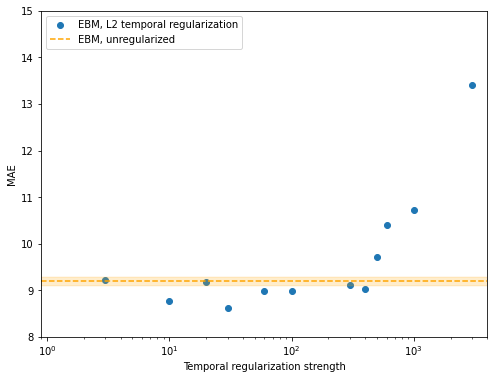

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

reg_vals = []
mae_vals = []

for run in sorted(l2_runs, key=lambda r: r.config['temporal_regularization']):
    reg_vals.append(run.config['temporal_regularization'])
    mae_vals.append(run.summary.mae)

# MAE baseline
explicit_mae_vals = [run.summary.mae for run in explicit_group_baseline_runs]
# EBM unregularized
ebm_unregularized_mae_vals = [run.summary.mae for run in ebm_unregularized_runs]

ax.set_xscale('log')

ax.set_ylabel('MAE')
ax.set_xlabel('Temporal regularization strength')

ax.set_ylim(8, 15)
ax.set_xlim(-5, np.max(reg_vals)+1000)

ebm_mae_mean = np.mean(ebm_unregularized_mae_vals)
ebm_mae_std = np.std(ebm_unregularized_mae_vals)

mae_mae_mean = np.mean(explicit_mae_vals)
mae_mae_std = np.std(explicit_mae_vals)

ax.scatter(reg_vals, mae_vals, label='EBM, L2 temporal regularization')
ax.fill_between(np.arange(-10, np.max(reg_vals) + 1000), ebm_mae_mean - ebm_mae_std, ebm_mae_mean + ebm_mae_std, color='orange', alpha=0.2)
ax.axhline(np.mean(ebm_unregularized_mae_vals), color='orange', linestyle='--', label='EBM, unregularized')

plt.legend(loc='upper left')

fig.savefig(f'{OUTPUT_DIR}/mae-vs-temp-reg-strength.png')

## 3. MAE vs Whiteness

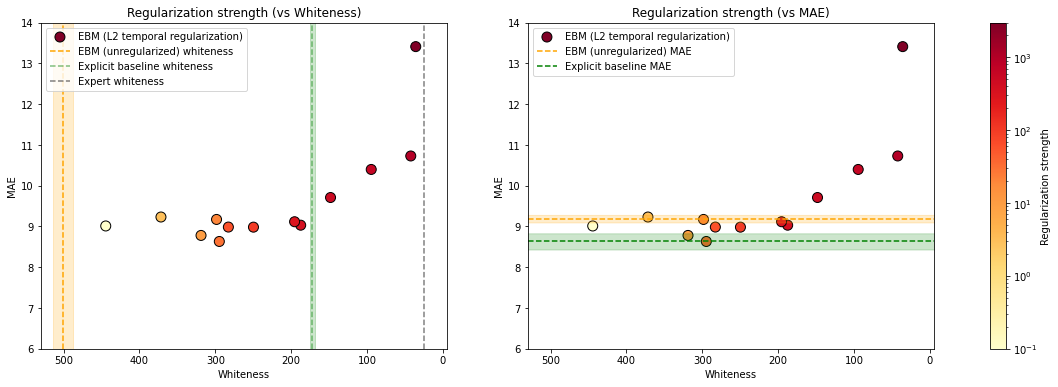

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

whiteness_vals = []
mae_vals = []
reg_strength_vals = []
expert_whiteness = None

for run in sorted(l2_runs, key=lambda r: r.summary.whiteness):
    whiteness_vals.append(run.summary.whiteness)
    mae_vals.append(run.summary.mae)
    reg_strength_vals.append(run.config['temporal_regularization'])
    if expert_whiteness is None:
        expert_whiteness = run.summary.expert_whiteness

# Explicit baseline
explicit_mae_vals = [run.summary.mae for run in explicit_group_baseline_runs]
explicit_whiteness_vals = [run.summary.whiteness for run in explicit_group_baseline_runs]
# EBM unregularized
ebm_unregularized_mae_vals = [run.summary.mae for run in ebm_unregularized_runs]
ebm_unregularized_whiteness_vals = [run.summary.whiteness for run in ebm_unregularized_runs]

# axes[0].set_xscale('log')

ebm_mae_mean = np.mean(ebm_unregularized_mae_vals)
ebm_mae_std = np.std(ebm_unregularized_mae_vals)

ebm_whiteness_mean = np.mean(ebm_unregularized_whiteness_vals)
ebm_whiteness_std = np.std(ebm_unregularized_whiteness_vals)

mae_mae_mean = np.mean(explicit_mae_vals)
mae_mae_std = np.std(explicit_mae_vals)

mae_whiteness_mean = np.mean(explicit_whiteness_vals)
mae_whiteness_std = np.std(explicit_whiteness_vals)


max_whiteness_val = max(np.max(whiteness_vals), np.max(ebm_unregularized_whiteness_vals), np.max(explicit_whiteness_vals))

for axes_i in range(2):
    axes[axes_i].set_ylabel('MAE')
    axes[axes_i].set_xlabel('Whiteness')

    axes[axes_i].set_ylim(6, 14)
    axes[axes_i].set_xlim(-5, max_whiteness_val+20)
    # axes[0].set_xlim(-5, np.max(whiteness_vals)+5)
    axes[axes_i].invert_xaxis()
    sc = axes[axes_i].scatter(whiteness_vals, mae_vals, c=reg_strength_vals, cmap='YlOrRd', linewidth=1, edgecolor='black', label='EBM (L2 temporal regularization)', s=100, norm=matplotlib.colors.LogNorm())


# whiteness baselines
axes[0].set_title('Regularization strength (vs Whiteness)')
axes[0].fill_betweenx(np.arange(0, axes[0].get_ylim()[-1]+5), ebm_whiteness_mean - ebm_whiteness_std, ebm_whiteness_mean + ebm_whiteness_std, color='orange', alpha=0.2)
axes[0].axvline(ebm_whiteness_mean, color='orange', linestyle='--', label='EBM (unregularized) whiteness')

axes[0].axvline(mae_whiteness_mean, color='green', linestyle='--', label='Explicit baseline whiteness', alpha=0.5)
axes[0].fill_betweenx(np.arange(0, axes[0].get_ylim()[-1]+5), mae_whiteness_mean - mae_whiteness_std, mae_whiteness_mean + mae_whiteness_std, color='green', alpha=0.2)
axes[0].axvline(expert_whiteness, color='black', linestyle='--', label='Expert whiteness', alpha=0.5)


# MAE baselines
axes[1].set_title('Regularization strength (vs MAE)')
axes[1].fill_between(np.arange(-10, max_whiteness_val + 100), ebm_mae_mean - ebm_mae_std, ebm_mae_mean + ebm_mae_std, color='orange', alpha=0.2)
axes[1].axhline(ebm_mae_mean, color='orange', linestyle='--', label='EBM (unregularized) MAE')

axes[1].fill_between(np.arange(-10, max_whiteness_val + 100), mae_mae_mean - mae_mae_std, mae_mae_mean + mae_mae_std, color='green', alpha=0.2)
axes[1].axhline(mae_mae_mean, color='green', linestyle='--', label='Explicit baseline MAE')



for axes_i in range(2):
    axes[axes_i].legend(loc='upper left')
    

fig.colorbar(sc, label='Regularization strength', ax=axes.ravel().tolist())
    

fig.savefig(f'{OUTPUT_DIR}/mae-vs-whiteness.png')

## 3a. Same as above, but baselines as dots

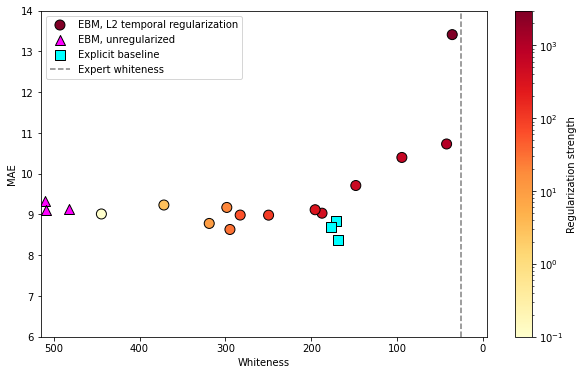

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

whiteness_vals = []
mae_vals = []
reg_strength_vals = []
expert_whiteness = None

for run in sorted(l2_runs, key=lambda r: r.summary.whiteness):
    whiteness_vals.append(run.summary.whiteness)
    mae_vals.append(run.summary.mae)
    reg_strength_vals.append(run.config['temporal_regularization'])
    if expert_whiteness is None:
        expert_whiteness = run.summary.expert_whiteness

# Explicit baseline
explicit_mae_vals = [run.summary.mae for run in explicit_group_baseline_runs]
explicit_whiteness_vals = [run.summary.whiteness for run in explicit_group_baseline_runs]
# EBM unregularized
ebm_unregularized_mae_vals = [run.summary.mae for run in ebm_unregularized_runs]
ebm_unregularized_whiteness_vals = [run.summary.whiteness for run in ebm_unregularized_runs]

# axes[0].set_xscale('log')

# ebm_mae_mean = np.mean(ebm_unregularized_mae_vals)
# ebm_mae_std = np.std(ebm_unregularized_mae_vals)

# ebm_whiteness_mean = np.mean(ebm_unregularized_whiteness_vals)
# ebm_whiteness_std = np.std(ebm_unregularized_whiteness_vals)

# mae_mae_mean = np.mean(explicit_mae_vals)
# mae_mae_std = np.std(explicit_mae_vals)

# mae_whiteness_mean = np.mean(explicit_whiteness_vals)
# mae_whiteness_std = np.std(explicit_whiteness_vals)


max_whiteness_val = max(np.max(whiteness_vals), np.max(ebm_unregularized_whiteness_vals), np.max(explicit_whiteness_vals))

ax.set_ylabel('MAE')
ax.set_xlabel('Whiteness')

ax.set_ylim(6, 14)
ax.set_xlim(-5, max_whiteness_val+5)
# ax.set_xlim(-5, np.max(whiteness_vals)+5)
ax.invert_xaxis()

sc = ax.scatter(whiteness_vals, mae_vals, c=reg_strength_vals, cmap='YlOrRd', linewidth=1, edgecolor='black', label='EBM, L2 temporal regularization', s=100, norm=matplotlib.colors.LogNorm())

# use triangles as markers for ebm_unregularized runs
ax.scatter(ebm_unregularized_whiteness_vals, ebm_unregularized_mae_vals, linewidth=1, edgecolor='black', c='magenta', label='EBM, unregularized', s=100, marker='^')
# use squares as markers for explicit runs
ax.scatter(explicit_whiteness_vals, explicit_mae_vals, linewidth=1, edgecolor='black', c='cyan', label='Explicit baseline', s=100, marker='s')
ax.axvline(expert_whiteness, color='black', linestyle='--', label='Expert whiteness', alpha=0.5)

# # whiteness baselines
# ax.set_title('Regularization strength (vs Whiteness)')
# ax.fill_betweenx(np.arange(0, axes[0].get_ylim()[-1]+5), ebm_whiteness_mean - ebm_whiteness_std, ebm_whiteness_mean + ebm_whiteness_std, color='orange', alpha=0.2)
# ax.axvline(ebm_whiteness_mean, color='orange', linestyle='--', label='EBM, unregularized')

# ax.axvline(mae_whiteness_mean, color='green', linestyle='--', label='Explicit baseline', alpha=0.5)
# ax.fill_betweenx(np.arange(0, axes[0].get_ylim()[-1]+5), mae_whiteness_mean - mae_whiteness_std, mae_whiteness_mean + mae_whiteness_std, color='green', alpha=0.2)


# # MAE baselines
# ax.set_title('Regularization strength (vs MAE)')
# ax.fill_between(np.arange(-10, max_whiteness_val + 100), ebm_mae_mean - ebm_mae_std, ebm_mae_mean + ebm_mae_std, color='orange', alpha=0.2)
# ax.axhline(ebm_mae_mean, color='orange', linestyle='--', label='EBM, unregularized')

# ax.fill_between(np.arange(-10, max_whiteness_val + 100), mae_mae_mean - mae_mae_std, mae_mae_mean + mae_mae_std, color='green', alpha=0.2)
# ax.axhline(mae_mae_mean, color='green', linestyle='--', label='Explicit baseline')



ax.legend(loc='upper left')
    

plt.colorbar(sc, label='Regularization strength')
    

fig.savefig(f'{OUTPUT_DIR}/mae-vs-whiteness-dots.png')

## Appendix. Example of accessing full run history

https://wandb.ai/nikebless-thesis/ibc/runs/1fwu46ie
https://wandb.ai/nikebless-thesis/ibc/runs/b6qeirab
https://wandb.ai/nikebless-thesis/ibc/runs/31ua9ivf
https://wandb.ai/nikebless-thesis/ibc/runs/3q87uqtb
https://wandb.ai/nikebless-thesis/ibc/runs/2x8qclz8


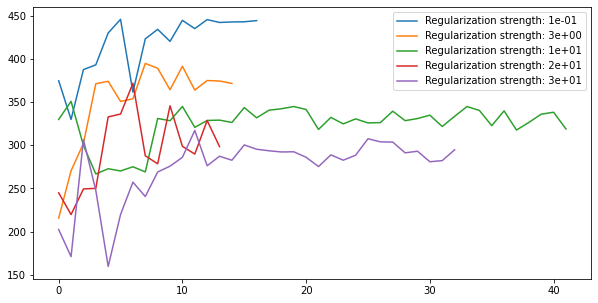

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for run in sorted(l2_runs, key=lambda r: r.config['temporal_regularization']):
    print(run.url)
    history = run.history(keys=['whiteness', 'mae', 'temporal_reg_loss', 'valid_temporal_reg_loss'])
    ax.plot(history['whiteness'], label=f'Regularization strength: {run.config["temporal_regularization"]:.0e}')

plt.legend()